# Homework 3 (Due 01/29/2024)

In [1]:
import sys
from matplotlib import pyplot as plt
import numpy as np
import astropy.units as u
from scipy.special import expn
from scipy.integrate import simps 

# importing custom functions

sys.path.append("../")
from ASTRO530 import plotting

/storage/icds/RISE/sw8/anaconda/conda_envs/pytorch/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


---
## Question 4
### Part A

In [2]:
def S_nu(tau,a_n): # source function
    sum = 0
    for i, a in enumerate(a_n):
        sum += a_n[i]*tau**i
    return sum

def I_nu_int(x,a_n): # integrand to numerically integrated inside I_nu calc
    return S_nu(x,a_n)*np.exp(-x)

def I_nu_calc(a,b,dx,a_n):
    return integrate_bounds(I_nu_int,a,b,dx,a_n)


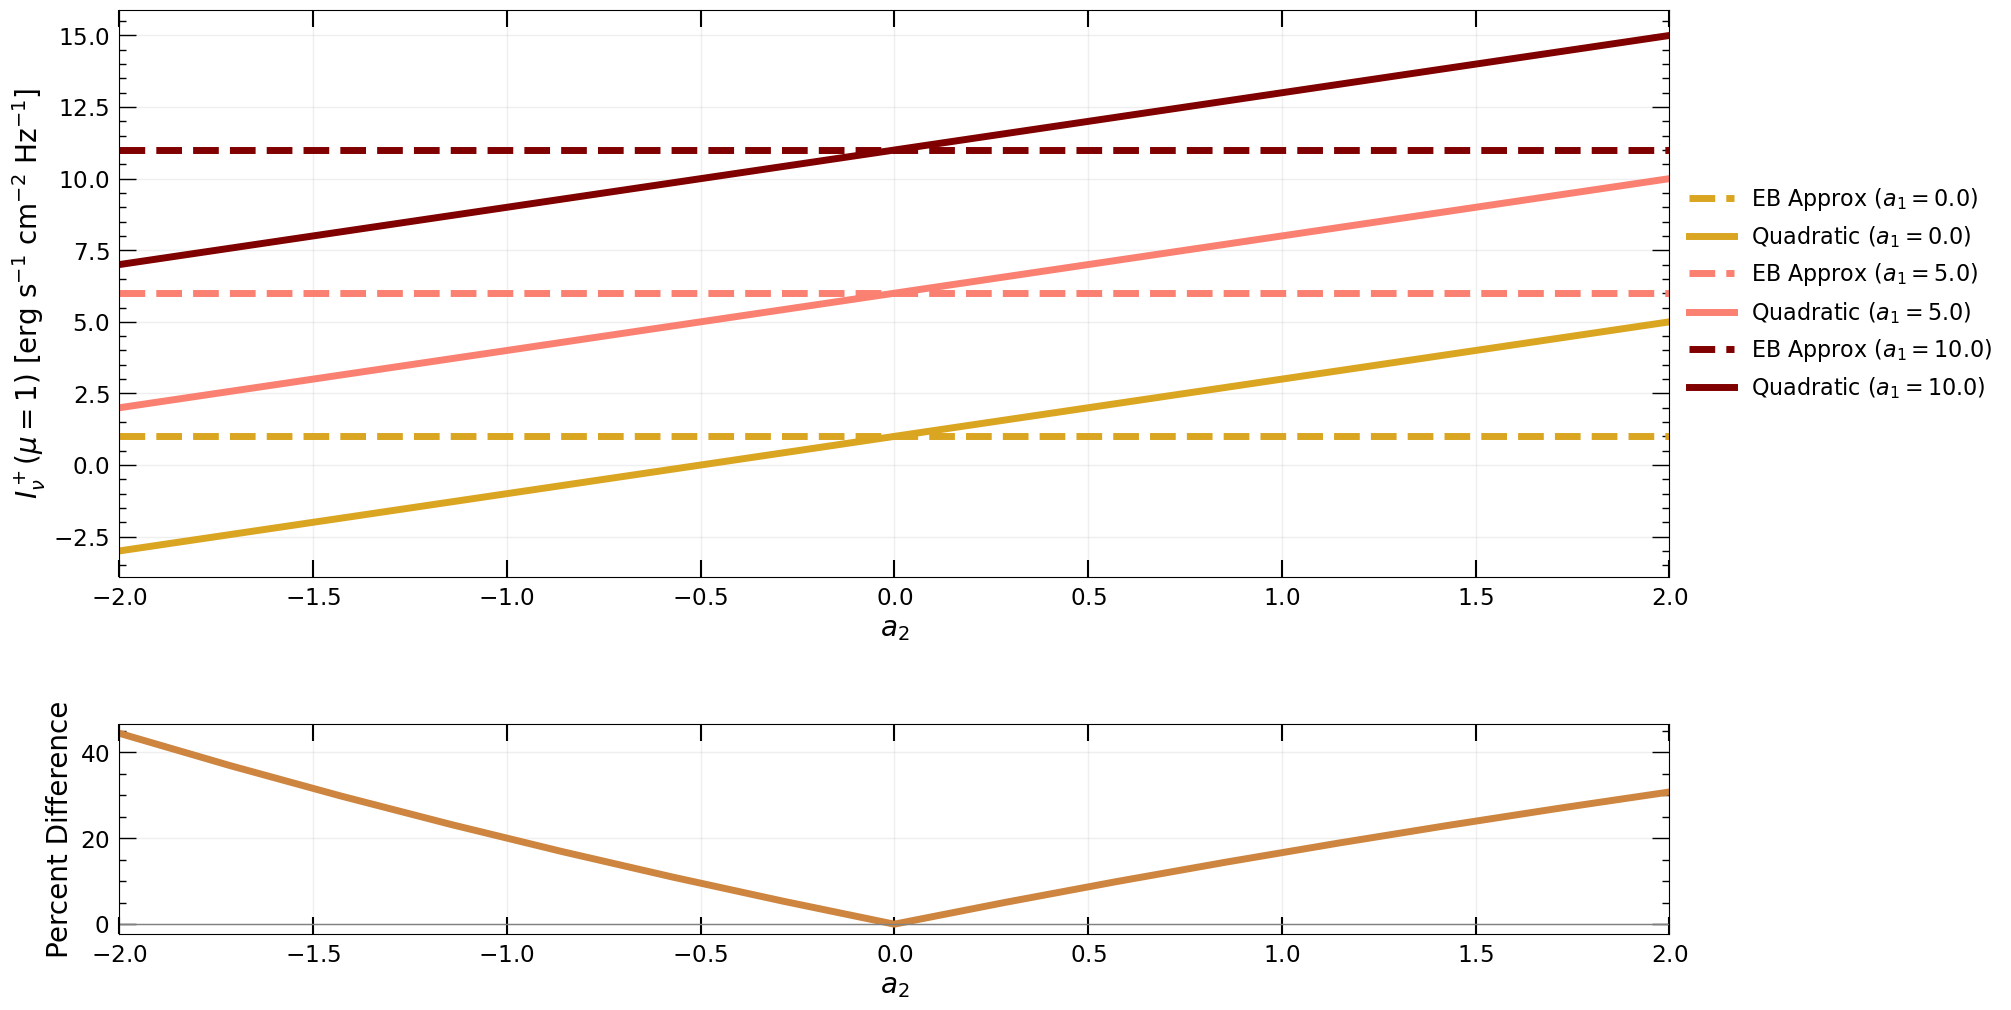

In [3]:
a_0 = 1
colors = [
    "goldenrod",
    "salmon",
    "maroon"
]

fig = plt.figure(figsize=(20,12))
grid = plt.GridSpec(3,1,wspace=0,hspace=0.7)


ax1 = fig.add_subplot(grid[0:2,0])
ax2 = fig.add_subplot(grid[2,0])

ax1.set_xlim(-2,2)
ax2.set_xlim(-2,2)

for i,a_1 in enumerate(np.linspace(0,10,3)):
    I_nu = []
    a_2s = np.linspace(-2,2,15)
    for a_2 in a_2s:
        a_n = [a_0,a_1,a_2]
        EB = I_nu_calc(0,10e2,10e-4,a_n[:2]) # EB approximation
        I_nu.append(I_nu_calc(0,10e2,10e-4,a_n)) # 2nd order intensity 
    
    ax1.axhline(EB,lw=5,linestyle='dashed',label=f'EB Approx ($a_1 = {a_1}$)',c=colors[i])
    ax1.plot(a_2s,I_nu,lw=5,label=f'Quadratic $(a_1 = {a_1}$)',c=colors[i])

ax2.plot(a_2s,200*abs(EB-I_nu)/(EB+I_nu),lw=5,c='peru')
ax2.axhline(0,lw=1,c='gray')

ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax1.set_ylabel(r'$I_{\nu}^+ (\mu = 1) \ [\mathrm{erg \ s^{-1} \ cm^{-2} \ Hz^{-1}}]$')
ax2.set_ylabel(r'Percent Difference')
ax1.set_xlabel(r'$a_2$')
ax2.set_xlabel(r'$a_2$')
ax1.grid()
ax2.grid()

plt.savefig("../Plots/HW3/EBapprox.pdf", bbox_inches='tight')

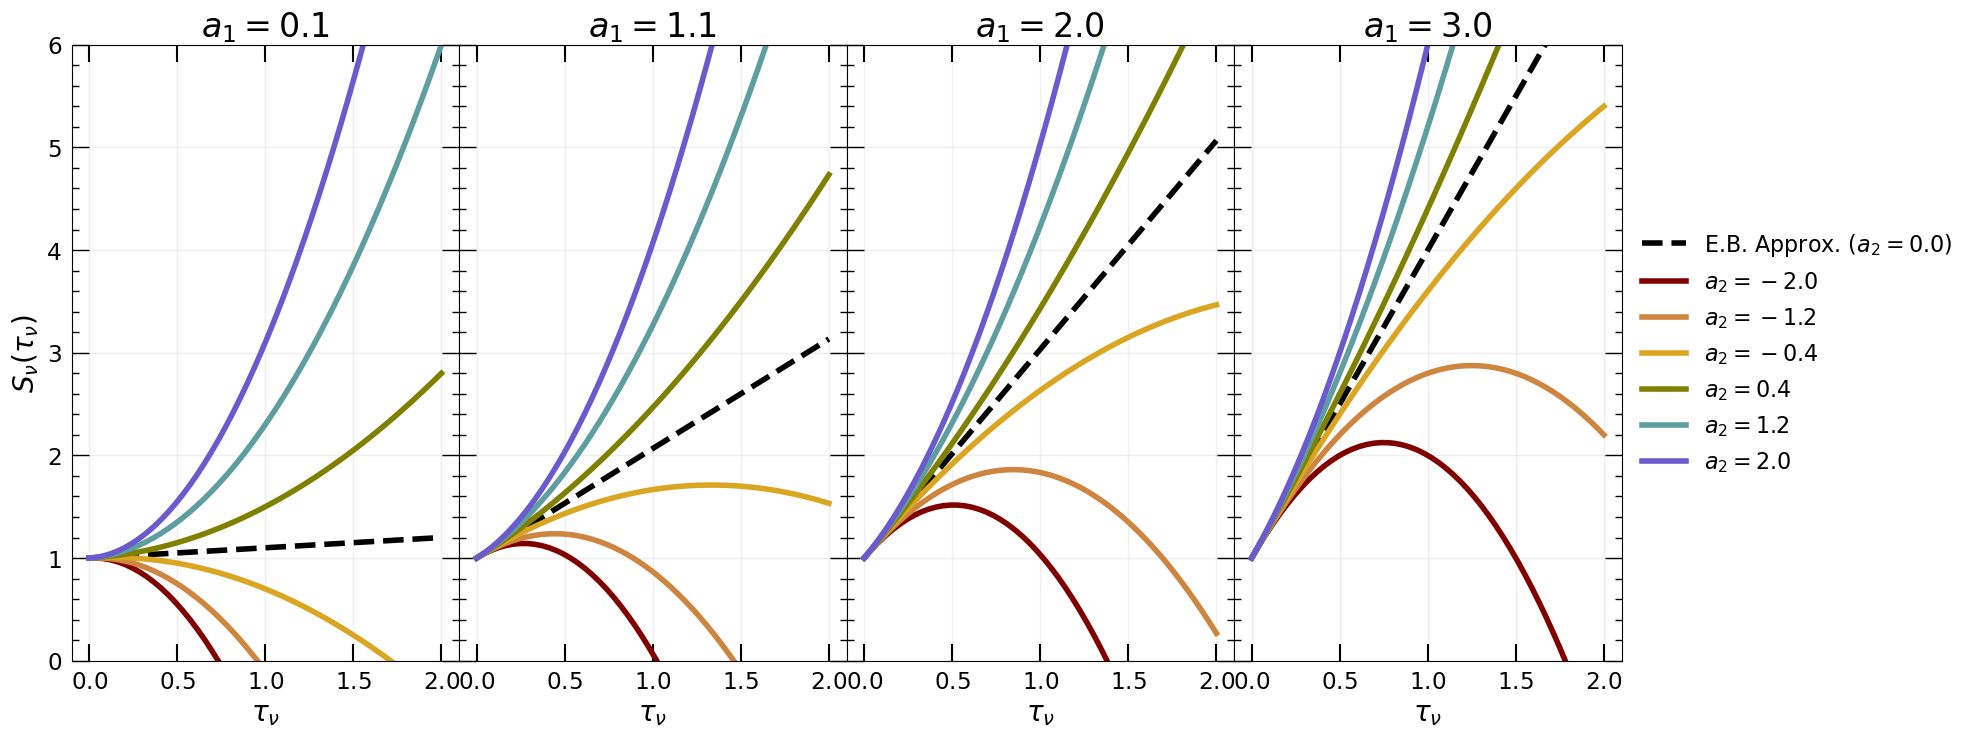

In [4]:
fig = plt.figure(figsize=(20,8))
grid = plt.GridSpec(1,4,wspace=0,hspace=0.4)

colors = [
    "maroon",
    "peru",
    "goldenrod",
    "olive",
    "cadetblue",
    "slateblue"
]

for i,a_1 in enumerate(np.linspace(0.1,3,4)):
    ax = fig.add_subplot(grid[0,i])

    a_n = [a_0,a_1,0]
    x = np.linspace(0,2) # integration array of optical depth
    
    plt.plot(x,S_nu(x,a_n),lw=4,label=fr'E.B. Approx. $(a_2=0.0)$',linestyle='dashed',c='k')
    a_2s = []
    a_2_space = np.linspace(-2,2,6)
    for j,a_2 in enumerate(a_2_space):
        a_n[2] = a_2
        if a_2 != 0.:
            plt.plot(x,S_nu(x,a_n),label=f'$a_2={round(a_2,1)}$',lw=4,c=colors[j])

    ax.set_title(f"$a_1={round(a_1,1)}$")

    if i > 0:
            ax.set_yticklabels([])
    if i == 0:
        ax.set_ylabel(r'$S_{\nu} (\tau_{\nu})$')

    if i == 3:
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_xlabel(r'$\tau_{\nu}$')
    ax.grid()
    ax.set_ylim(0,6)
        
plt.savefig("../Plots/HW3/S_nu.pdf",bbox_inches='tight')
plt.show()

### Part B

In [5]:
def I_nu_true(mu,a_n):
    n = len(a_n)-1 
    sum = 0
    for i,n in enumerate(range(n+1)):
        sum += math.factorial(n)*(mu**n)*a_n[i]
    return sum

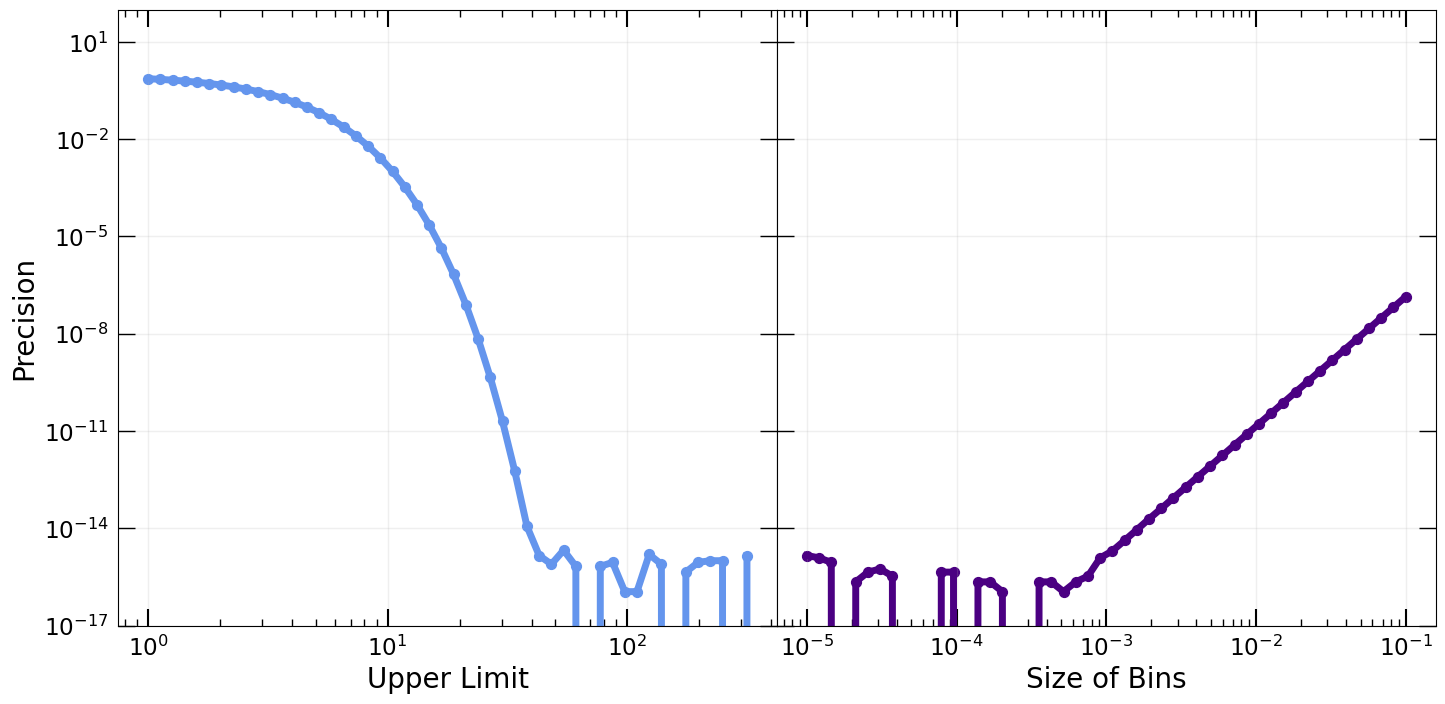

In [6]:
a_n = [1,1,1] # setting all a_n coefficients to 1
mu = 1
plot_precisions_bdx(I_nu_calc,I_nu_true(mu,a_n),"HW3/I_int_precision",a_n) 

---
## Question 5
### Part A, B, C

In [7]:
def E_n_int(a,b,dx,n): 
    num = int(round((np.log10(b)-np.log10(a))/dx,0))
    x = np.logspace(np.log10(a),np.log10(b),num)
    if n == 1:
        y = exp1(x) # exception to avoid singularity when n=1
    else:
        y = expn(n,x)
    return simps(y,x)

In [8]:
for n in [1,2,3]:
    calc = E_n_int(10e-18,10e2,10e-5,n)
    prec = precision(1/n,calc)
    print("The value of the integral for n =",n,"is ",round(calc,5),"with a precision of ",prec)

The value of the integral for n = 1 is  1.0 with a precision of  8.881784197001252e-16
The value of the integral for n = 2 is  0.5 with a precision of  6.661338147750939e-16
The value of the integral for n = 3 is  0.33333 with a precision of  5.551115123125783e-16


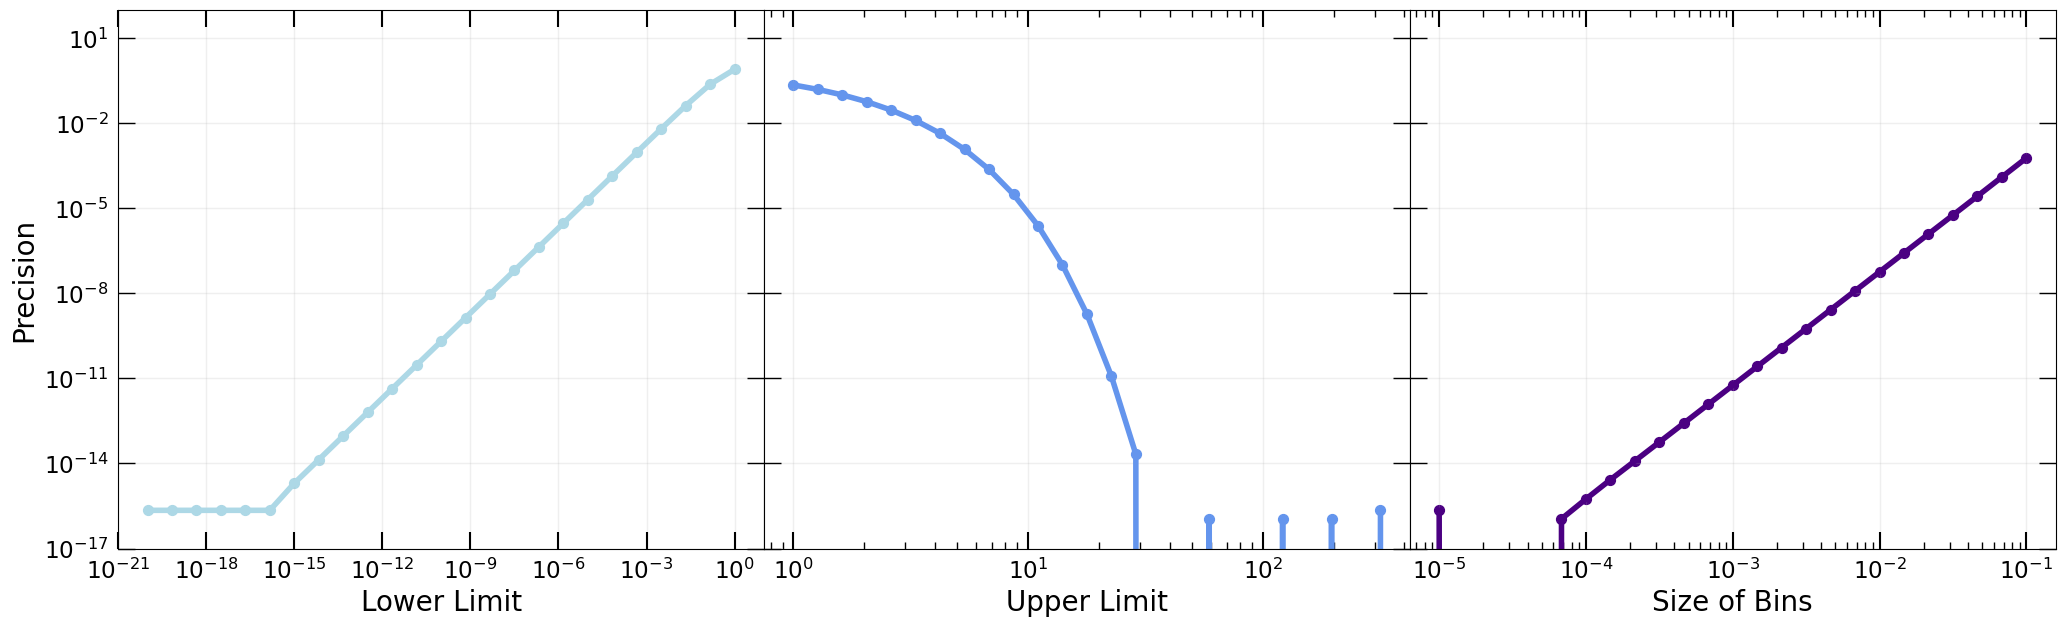

In [9]:
n = 2
plot_precisions_abdx(E_n_int,1/n,"HW3/E_n_int_precision",n) 

In [10]:
import time
n = 2
start_time = time.time()
calc = E_n_int(10e-18,10e2,10e-5,n)
end_time = time.time()

dt = end_time - start_time
prec = precision(1/n,calc)

print("The time elapsed to recieve a precision of",prec,"was:",dt,"seconds.")


The time elapsed to recieve a precision of 6.661338147750939e-16 was: 0.0418400764465332 seconds.
